# Association Rule Learning (Apriori & Eclat)

In [76]:
import random
import pandas as pd

# Define a list of common items in a market basket
items = ['jelly','M&M','strawberry','eggs', 'apple', 'bread', 'wine', 
         'ketchup', 'milk', 'cheese', 'grapes', 'butter', 'yogurt',
         'coffee', 'tea', 'banana', 'orange', 'chocolate']

# Generate a dataset with 150 rows (transactions)
num_transactions = 450
min_items = 2
max_items = 6

# Create an empty list to hold the transactions
transactions = []

# Loop to generate each transaction
for _ in range(num_transactions):
    # Randomly choose the number of items in this transaction
    num_items_in_transaction = random.randint(min_items, max_items)
    
    # Randomly choose items without replacement
    transaction = random.sample(items, num_items_in_transaction)
    
    # Append the transaction to the list
    transactions.append(transaction)

# Convert the transactions to a DataFrame and save it
df = pd.DataFrame(transactions)

# Display the first few rows of the DataFrame
print(df.head())

            0       1           2          3       4       5
0  strawberry    wine        eggs       None    None    None
1   chocolate    eggs        None       None    None    None
2       bread  coffee      yogurt       None    None    None
3         M&M  banana  strawberry  chocolate    None    None
4       apple  grapes        wine  chocolate  coffee  butter


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       450 non-null    object
 1   1       450 non-null    object
 2   2       351 non-null    object
 3   3       277 non-null    object
 4   4       183 non-null    object
 5   5       98 non-null     object
dtypes: object(6)
memory usage: 21.2+ KB


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

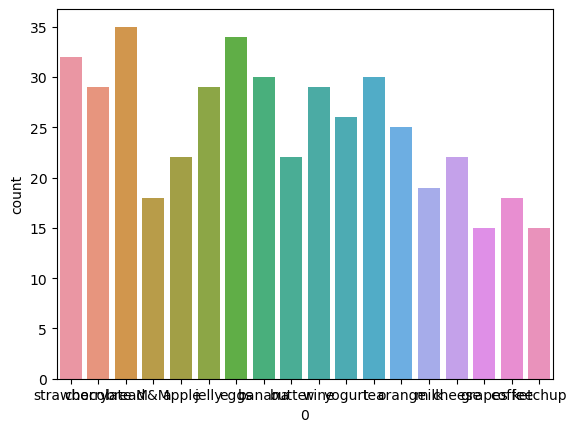

In [79]:
sns.countplot(x = df[0],data = df)
plt.show()

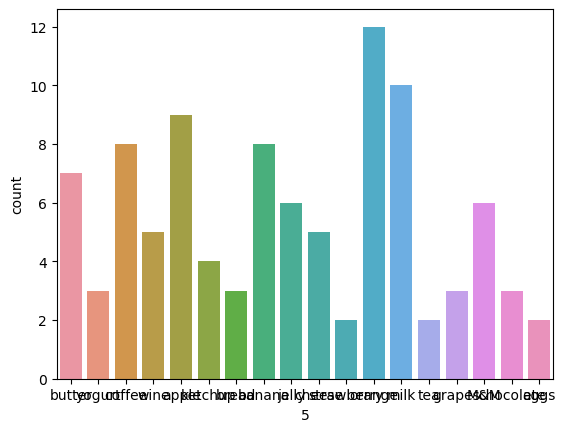

In [80]:
sns.countplot(x = df[5],data = df)
plt.show()

In [81]:
df = df.fillna("")
df

,0,1,2,3,4,5
0,strawberry,wine,eggs,,,
1,chocolate,eggs,,,,
2,bread,coffee,yogurt,,,
3,M&M,banana,strawberry,chocolate,,
4,apple,grapes,wine,chocolate,coffee,butter
...,...,...,...,...,...,...
445,chocolate,ketchup,eggs,bread,jelly,
446,jelly,grapes,,,,
447,butter,orange,jelly,coffee,wine,chocolate
448,butter,strawberry,,,,


In [82]:
!pip install apyori

# Preprocessing Data for Apriori Model

In [96]:
all_transactions = []
for i in range(0, 450):
    all_transactions.append([df.values[i,k] for k in range(6)])

all_transactions

[['strawberry', 'wine', 'eggs', '', '', ''],
 ['chocolate', 'eggs', '', '', '', ''],
 ['bread', 'coffee', 'yogurt', '', '', ''],
 ['M&M', 'banana', 'strawberry', 'chocolate', '', ''],
 ['apple', 'grapes', 'wine', 'chocolate', 'coffee', 'butter'],
 ['strawberry', 'bread', 'wine', 'banana', 'cheese', 'yogurt'],
 ['M&M', 'butter', '', '', '', ''],
 ['jelly', 'grapes', 'milk', 'chocolate', 'eggs', 'coffee'],
 ['eggs', 'banana', '', '', '', ''],
 ['banana', 'M&M', 'tea', 'cheese', 'eggs', ''],
 ['butter', 'M&M', 'ketchup', 'bread', 'eggs', 'wine'],
 ['wine', 'orange', 'grapes', '', '', ''],
 ['jelly', 'ketchup', 'yogurt', 'eggs', 'milk', 'apple'],
 ['bread', 'apple', 'jelly', 'coffee', 'butter', ''],
 ['jelly', 'bread', 'M&M', '', '', ''],
 ['butter', 'wine', 'strawberry', 'tea', 'cheese', 'ketchup'],
 ['yogurt', 'milk', 'bread', 'eggs', 'tea', ''],
 ['tea', 'ketchup', 'bread', '', '', ''],
 ['orange', 'grapes', '', '', '', ''],
 ['chocolate', 'cheese', 'ketchup', '', '', ''],
 ['chocolate'

In [97]:
from apyori import apriori

In [98]:
rules = apriori(transactions = all_transactions,
                min_support = 0.0127, 
                min_confidence = 0.2,
                min_lift = 2,
                min_lenght = 2,
                max_lenght = 2
               )

In [99]:
outcome = list(rules)
outcome

[RelationRecord(items=frozenset({'apple', 'banana', 'grapes'}), support=0.02666666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'apple', 'banana'}), items_add=frozenset({'grapes'}), confidence=0.46153846153846156, lift=2.1862348178137654)]),
 RelationRecord(items=frozenset({'orange', 'milk', 'bread'}), support=0.017777777777777778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'orange', 'milk'}), items_add=frozenset({'bread'}), confidence=0.5333333333333333, lift=2.051282051282051)]),
 RelationRecord(items=frozenset({'wine', 'cheese', 'strawberry'}), support=0.017777777777777778, ordered_statistics=[OrderedStatistic(items_base=frozenset({'wine', 'cheese'}), items_add=frozenset({'strawberry'}), confidence=0.42105263157894735, lift=2.15311004784689), OrderedStatistic(items_base=frozenset({'wine', 'strawberry'}), items_add=frozenset({'cheese'}), confidence=0.38095238095238093, lift=2.090592334494773)]),
 RelationRecord(items=frozenset({'milk', 'eggs', 

In [100]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in outcome]
    rhs = [tuple(result[2][0][1])[0] for result in outcome]
    supports = [result[1] for result in outcome]
    confidences = [result[2][0][2] for result in outcome]
    lifts = [result[2][0][3] for result in outcome]
    return list(zip(lhs, rhs, supports, confidences, lifts))

new_df = pd.DataFrame(inspect(outcome), 
                                  columns = ["Left Hand Side",
                                             "Right Hand Side",
                                             "Support",
                                             "Confidence",
                                             "Lift"])


In [101]:
new_df

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,apple,grapes,0.026667,0.461538,2.186235
1,orange,bread,0.017778,0.533333,2.051282
2,wine,strawberry,0.017778,0.421053,2.153110
3,eggs,milk,0.017778,0.400000,2.142857
4,eggs,milk,0.015556,0.388889,2.083333
5,ketchup,wine,0.028889,0.619048,2.422360
6,,banana,0.015556,0.466667,2.019231
7,,yogurt,0.015556,0.500000,2.205882
8,,jelly,0.015556,0.466667,2.164948
9,,wine,0.015556,0.700000,2.739130


In [102]:
new_df.nlargest(n = 10, columns = "Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
9,,wine,0.015556,0.700000,2.739130
5,ketchup,wine,0.028889,0.619048,2.422360
7,,yogurt,0.015556,0.500000,2.205882
0,apple,grapes,0.026667,0.461538,2.186235
8,,jelly,0.015556,0.466667,2.164948
2,wine,strawberry,0.017778,0.421053,2.153110
3,eggs,milk,0.017778,0.400000,2.142857
4,eggs,milk,0.015556,0.388889,2.083333
1,orange,bread,0.017778,0.533333,2.051282
6,,banana,0.015556,0.466667,2.019231


In [90]:
# So people most like to buy just wine, 
# after this, wine with ketchup is the most frequently preffered.

# Eclat Model

In [103]:
def inspect_for_eclat(results):
    lhs = [tuple(result[2][0][0])[0] for result in outcome]
    rhs = [tuple(result[2][0][1])[0] for result in outcome]
    supports = [result[1] for result in outcome]

    return list(zip(lhs, rhs, supports))

new_df = pd.DataFrame(inspect_for_eclat(outcome), 
                                  columns = ["Product 1",
                                             "Product 2",
                                             "Support",
                                             ])

In [104]:
new_df

,Product 1,Product 2,Support
0,apple,grapes,0.026667
1,orange,bread,0.017778
2,wine,strawberry,0.017778
3,eggs,milk,0.017778
4,eggs,milk,0.015556
5,ketchup,wine,0.028889
6,,banana,0.015556
7,,yogurt,0.015556
8,,jelly,0.015556
9,,wine,0.015556


In [93]:
new_df.sort_values("Support", ascending = False)

,Product 1,Product 2,Support
5,ketchup,wine,0.028889
0,apple,grapes,0.026667
1,orange,bread,0.017778
2,wine,strawberry,0.017778
3,eggs,milk,0.017778
4,eggs,milk,0.015556
6,,banana,0.015556
7,,yogurt,0.015556
8,,jelly,0.015556
9,,wine,0.015556
